In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# load the dataset
df = pd.read_csv("car_data.csv")

# create copy of original dataset
orig_df = df.copy()

print(df.head())

         Make    Model                          Version      Price  Make_Year  \
0       Honda  Insight                              NaN  7400000.0       2019   
1  Mitsubishi   Minica                     Black Minica  1065000.0       2019   
2        Audi       A6  1.8 TFSI Business Class Edition  9300000.0       2015   
3      Toyota     Aqua                                G  2375000.0       2014   
4       Honda     City                       1.3 i-VTEC  2600000.0       2017   

     CC  Assembly  Mileage Registered City Transmission  
0  1500  Imported     2000   Un-Registered    Automatic  
1   660  Imported    68000          Lahore    Automatic  
2  1800     Local    70000          Lahore    Automatic  
3  1500  Imported    99900       Islamabad    Automatic  
4  1300     Local    55000       Islamabad       Manual  


In [17]:
target_feature = 'Price'
numerical_features = ['CC', 'Mileage', 'Make_Year']
categorical_features = ['Make', 'Model', 'Version', 'Assembly', 'Registered City', 'Transmission']

# **Data Exploration**

In [18]:
# There are some textual values in the price column (which is not letting us visualized price correctly).
# So we are removing them.

# errors='coerce' converts non-numeric values to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Keep only the rows having valid values using boolean indexing
df = df[df['Price'].notnull()]

# Print the non-numeric values
print(df['Price'])

0        7400000.0
1        1065000.0
2        9300000.0
3        2375000.0
4        2600000.0
           ...    
80567     750000.0
80568    1480000.0
80569    2700000.0
80570     600000.0
80571    2620000.0
Name: Price, Length: 79363, dtype: float64


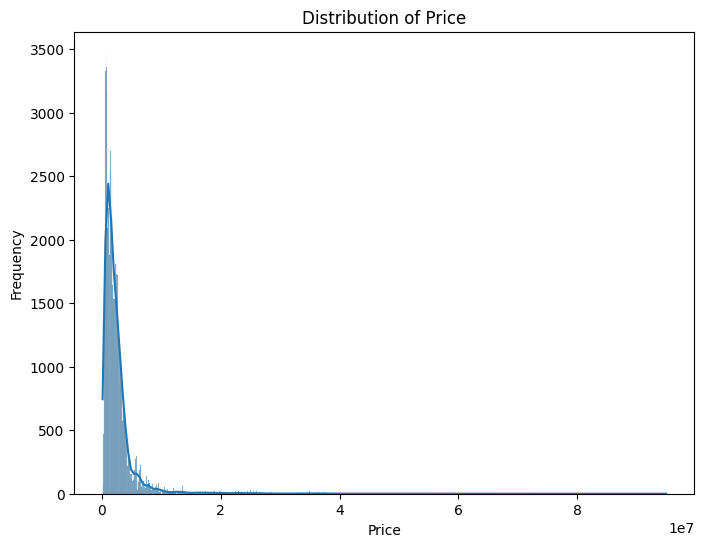

In [19]:
# Show the distribution of Target_Feature

plt.figure(figsize=(8,6))
sns.histplot(df[target_feature], kde=True)
plt.title(f'Distribution of {target_feature}')
plt.xlabel(target_feature)
plt.ylabel('Frequency')
plt.show()

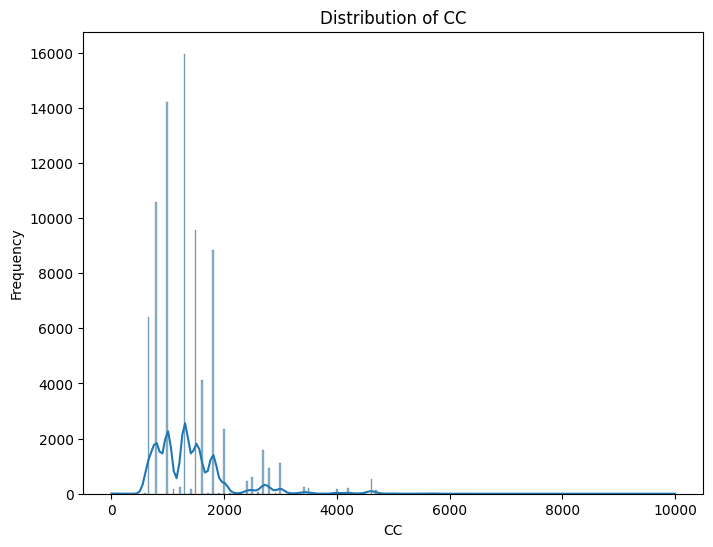

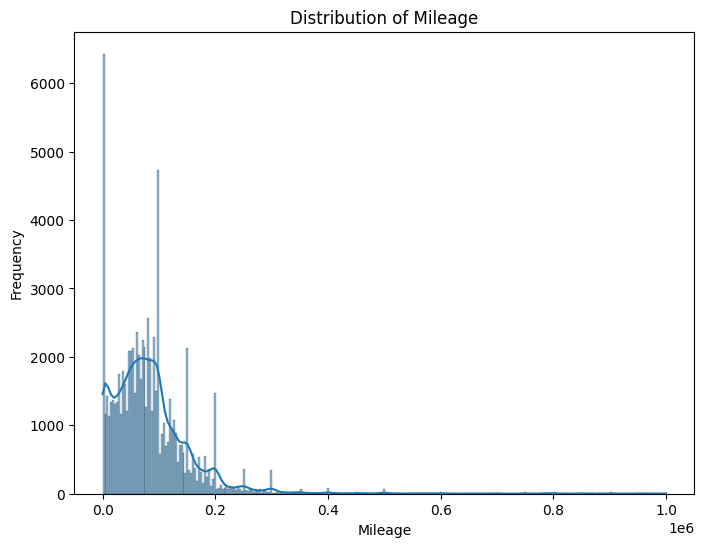

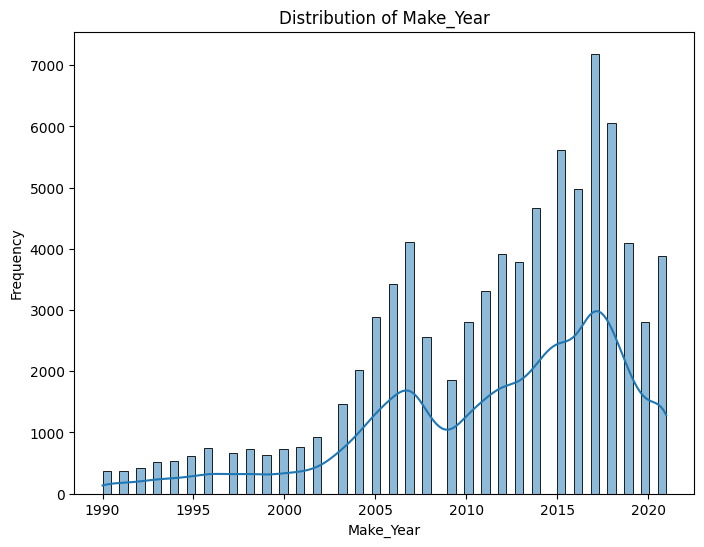

In [20]:
# Show the distributions of numerical predictor features as well

for feature in numerical_features:
  plt.figure(figsize=(8,6))
  sns.histplot(df[feature], kde=True)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

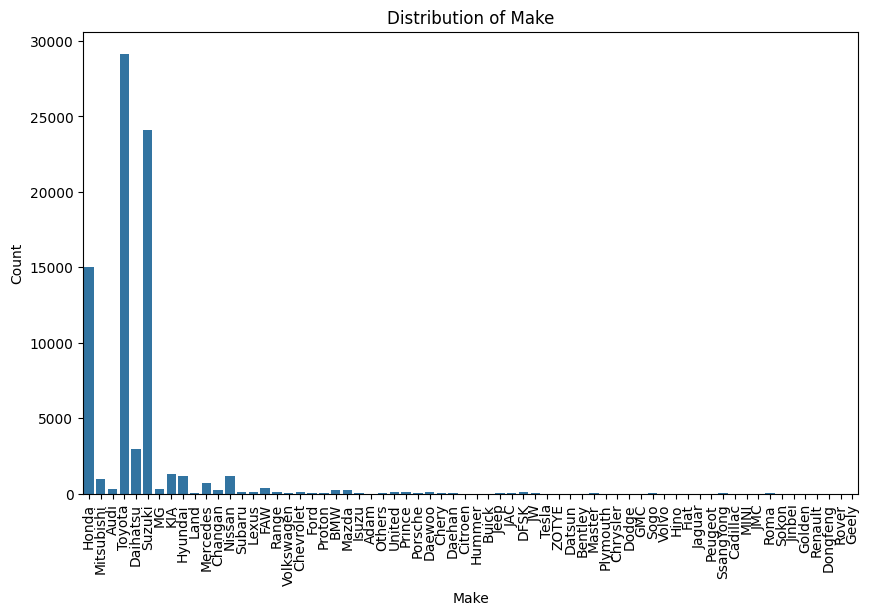

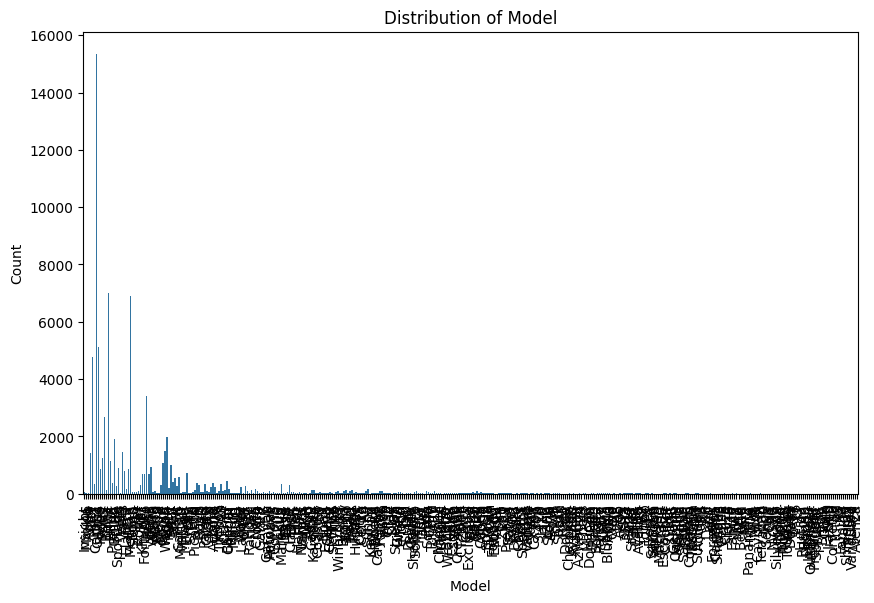

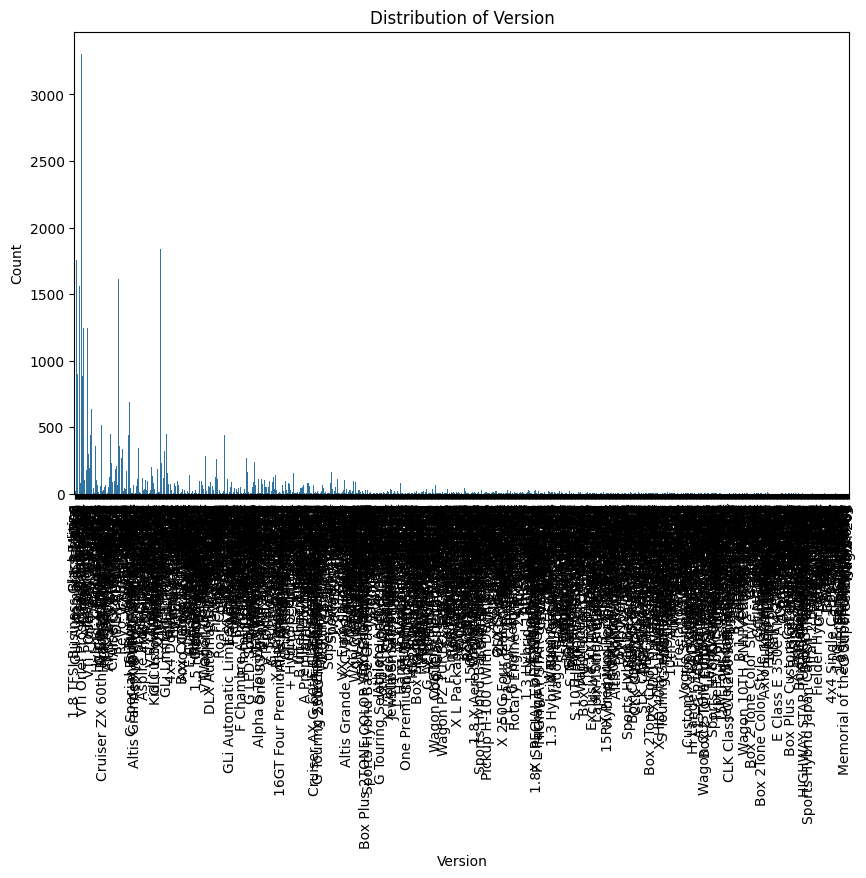

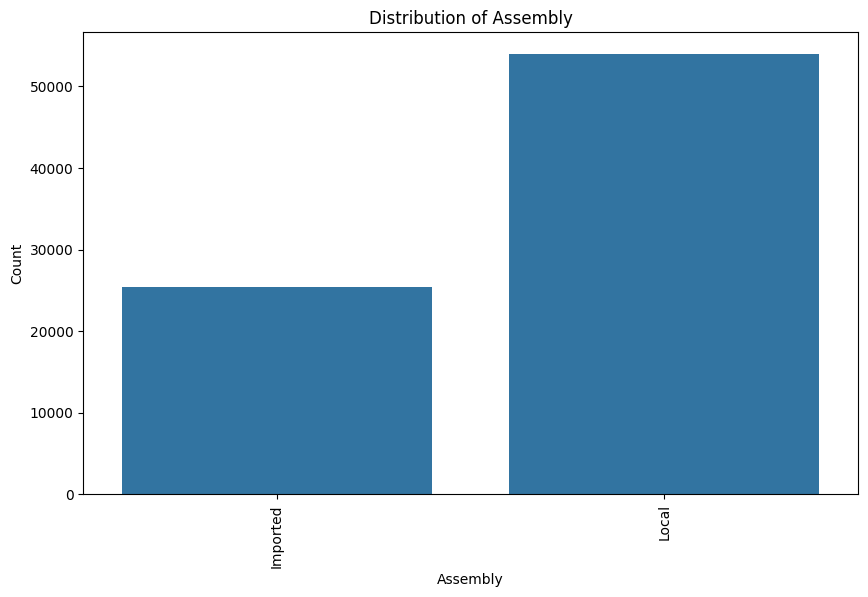

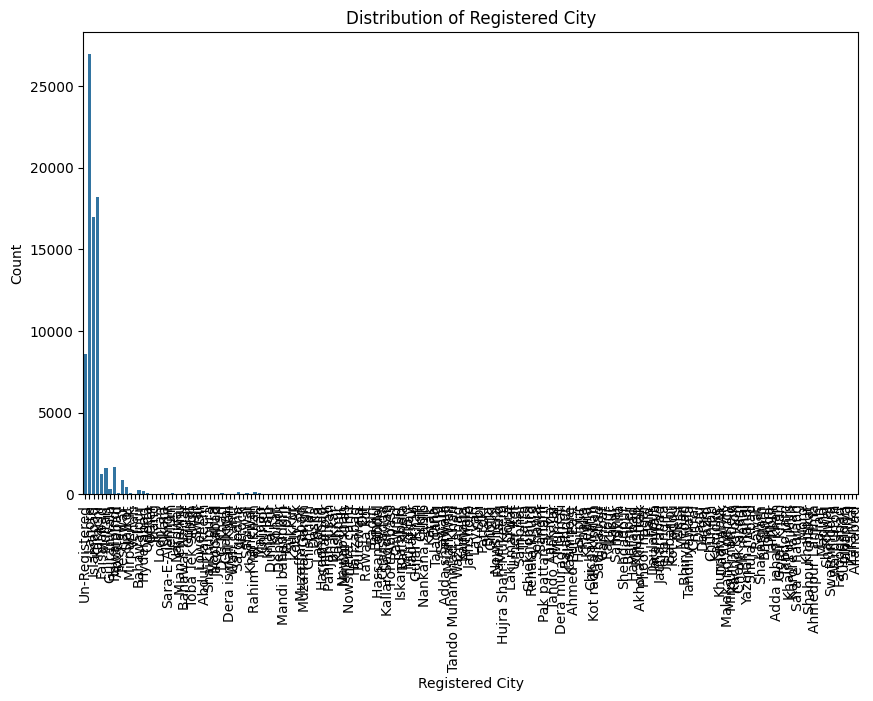

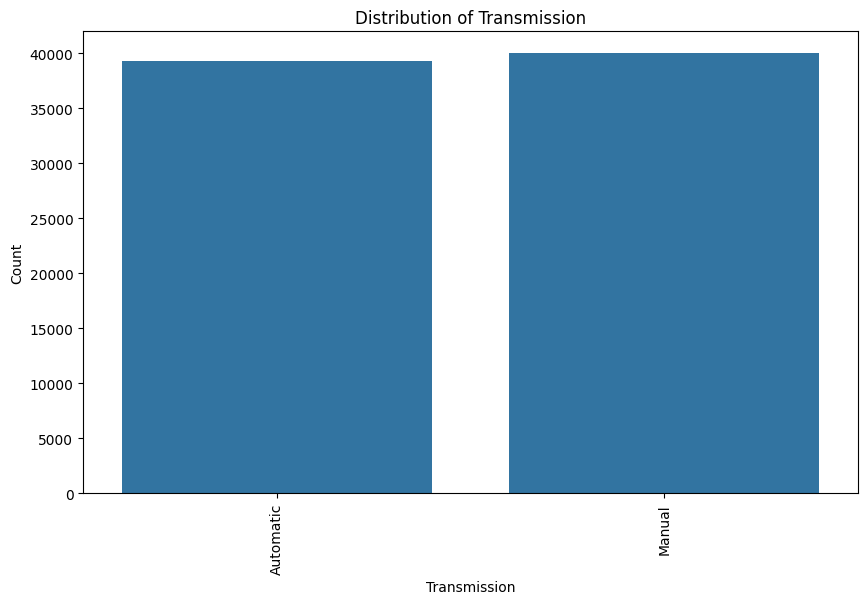

In [21]:
# Show distribution of categorical features as well

for feature in categorical_features:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df, x=feature)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.xticks(rotation=90)
  plt.ylabel('Count')
  plt.show()

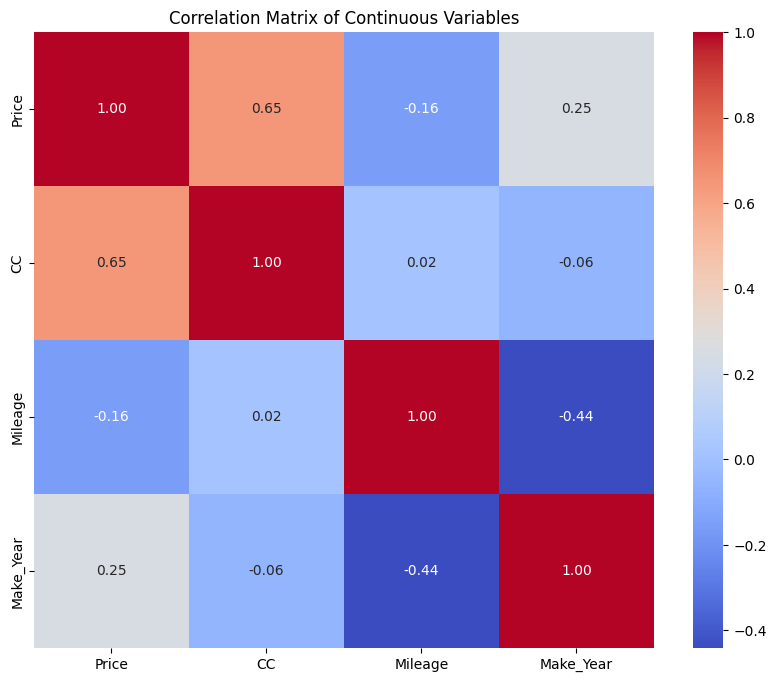

In [22]:
# Calculate the correlation matrix of numerical features
correlation_matrix = df[[target_feature] + numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

# **Simple Data Preprocessing**

In [23]:
# Check if there are any null values

print(df.isnull().sum())

Make                  0
Model                 0
Version            6708
Price                 0
Make_Year             0
CC                    0
Assembly              0
Mileage               0
Registered City       0
Transmission          0
dtype: int64


In [24]:
# Replace these null values with 'unknown'
df['Version'].fillna('unknown', inplace=True)
print(df.isnull().sum())

Make               0
Model              0
Version            0
Price              0
Make_Year          0
CC                 0
Assembly           0
Mileage            0
Registered City    0
Transmission       0
dtype: int64


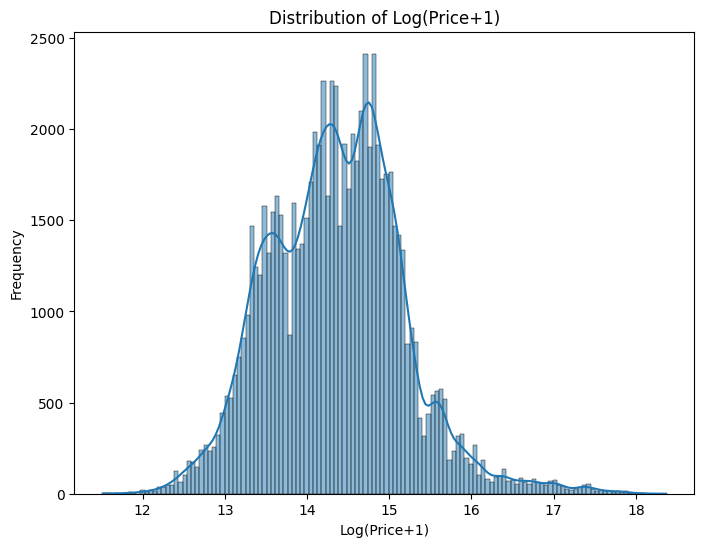

In [25]:
# Apply log transformation to the target variable to follow Normal Distribution (Bell Shaped Curve)
df['Log(Price+1)'] = np.log1p(df[target_feature])

df.drop(columns=['Price'], inplace=True)

# Updated target_feature
target_feature = 'Log(Price+1)'

# Now Show the distribution of target_feature (Price)
plt.figure(figsize=(8,6))
sns.histplot(df[target_feature], kde=True)
plt.title(f'Distribution of {target_feature}')
plt.xlabel(target_feature)
plt.ylabel('Frequency')
plt.show()

In [26]:
# Preprocess categorical features by converting them to lower case, strip spaces, and replace ' ' with '_'
for col in categorical_features:
    df[col] = df[col].str.lower().str.strip().str.replace(' ', '_')

# Display the updated DataFrame
print(df.head())

         Make    Model                          Version  Make_Year    CC  \
0       honda  insight                          unknown       2019  1500   
1  mitsubishi   minica                     black_minica       2019   660   
2        audi       a6  1.8_tfsi_business_class_edition       2015  1800   
3      toyota     aqua                                g       2014  1500   
4       honda     city                       1.3_i-vtec       2017  1300   

   Assembly  Mileage Registered City Transmission  Log(Price+1)  
0  imported     2000   un-registered    automatic     15.816991  
1  imported    68000          lahore    automatic     13.878486  
2     local    70000          lahore    automatic     16.045525  
3  imported    99900       islamabad    automatic     14.680508  
4     local    55000       islamabad       manual     14.771022  


In [27]:
# Scale the numerical features

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the updated DataFrame
print(df[numerical_features].head())

         CC   Mileage  Make_Year
0  0.154314 -1.022196   1.056185
1 -1.092127 -0.222265   1.056185
2  0.599471 -0.198025   0.481224
3  0.154314  0.164368   0.337484
4 -0.142458 -0.379827   0.768705


In [28]:
# Before Performing one-hot encoding, create copy of df
processed_df = df.copy()

In [29]:
# Perform one-hot encoding of the categorical columns
df = pd.get_dummies(df, columns=categorical_features, drop_first=True, dtype=int)

print(df.head())

   Make_Year        CC   Mileage  Log(Price+1)  Make_audi  Make_bentley  \
0   1.056185  0.154314 -1.022196     15.816991          0             0   
1   1.056185 -1.092127 -0.222265     13.878486          0             0   
2   0.481224  0.599471 -0.198025     16.045525          1             0   
3   0.337484  0.154314  0.164368     14.680508          0             0   
4   0.768705 -0.142458 -0.379827     14.771022          0             0   

   Make_bmw  Make_buick  Make_cadillac  Make_changan  ...  \
0         0           0              0             0  ...   
1         0           0              0             0  ...   
2         0           0              0             0  ...   
3         0           0              0             0  ...   
4         0           0              0             0  ...   

   Registered City_toba_tek_singh  Registered City_umer_kot  \
0                               0                         0   
1                               0                       

# **Initial Model Evaluation**

In [30]:
# Train Test Split
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop(columns=[target_feature])  # Features
y = df[target_feature]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 3.909867346920683e+18


Mean Squared Error: 0.1755352539011277


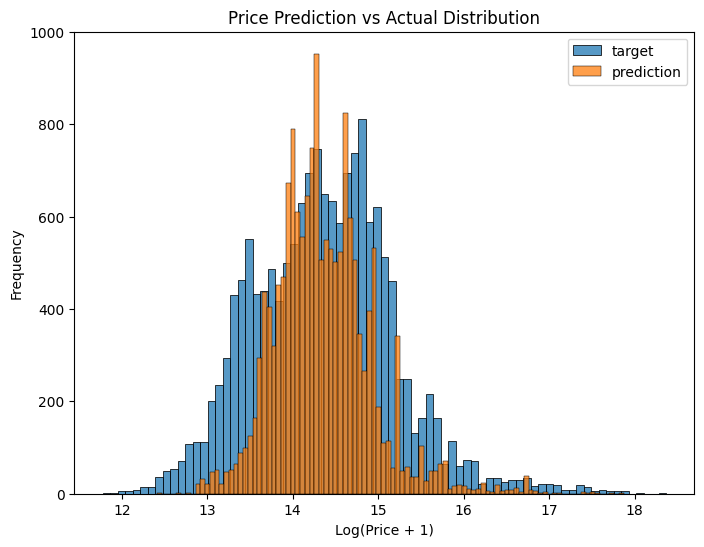

In [33]:
# Lasso Regression Model

from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)  # Alpha is the regularization strength

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

# Draw comparison
plt.figure(figsize=(8, 6))

sns.histplot(y_test, label='target', kde=False)
sns.histplot(y_pred, label='prediction', kde=False)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Price Prediction vs Actual Distribution')

plt.show()

Mean Squared Error: 0.04228479615261895


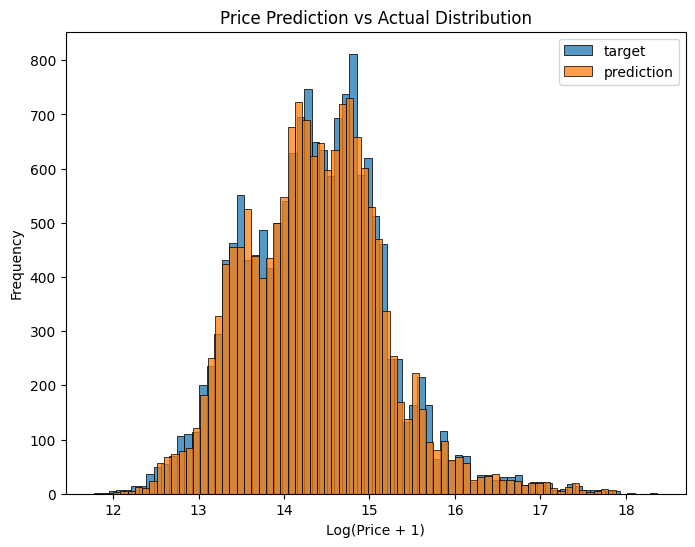

In [34]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regression model
random_forest_model = RandomForestRegressor(n_estimators=15, random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

# Draw comparison
plt.figure(figsize=(8, 6))

sns.histplot(y_test, label='target', kde=False)
sns.histplot(y_pred, label='prediction', kde=False)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Price Prediction vs Actual Distribution')

plt.show()

# **Feature Engineering**

In order to further improve our results, we will perform some feature engineering.

In [35]:
df = processed_df.copy()

# Instead of using 'Make_Year', we will use 'Age' column

# Drop the 'Make_Year' column
df.drop(columns=['Make_Year'], inplace=True)

# Calculate current year
current_year = datetime.datetime.now().year

# Create 'Age' column
df['Age'] = current_year - orig_df['Make_Year']

# Scale the Age column as well
df['Age'] = scaler.fit_transform(df[['Age']])

numerical_features = ['CC', 'Mileage', 'Age']

# Display the updated DataFrame
print(df.head())

         Make    Model                          Version        CC  Assembly  \
0       honda  insight                          unknown  0.154314  imported   
1  mitsubishi   minica                     black_minica -1.092127  imported   
2        audi       a6  1.8_tfsi_business_class_edition  0.599471     local   
3      toyota     aqua                                g  0.154314  imported   
4       honda     city                       1.3_i-vtec -0.142458     local   

    Mileage Registered City Transmission  Log(Price+1)       Age  
0 -1.022196   un-registered    automatic     15.816991 -1.056185  
1 -0.222265          lahore    automatic     13.878486 -1.056185  
2 -0.198025          lahore    automatic     16.045525 -0.481224  
3  0.164368       islamabad    automatic     14.680508 -0.337484  
4 -0.379827       islamabad       manual     14.771022 -0.768705  


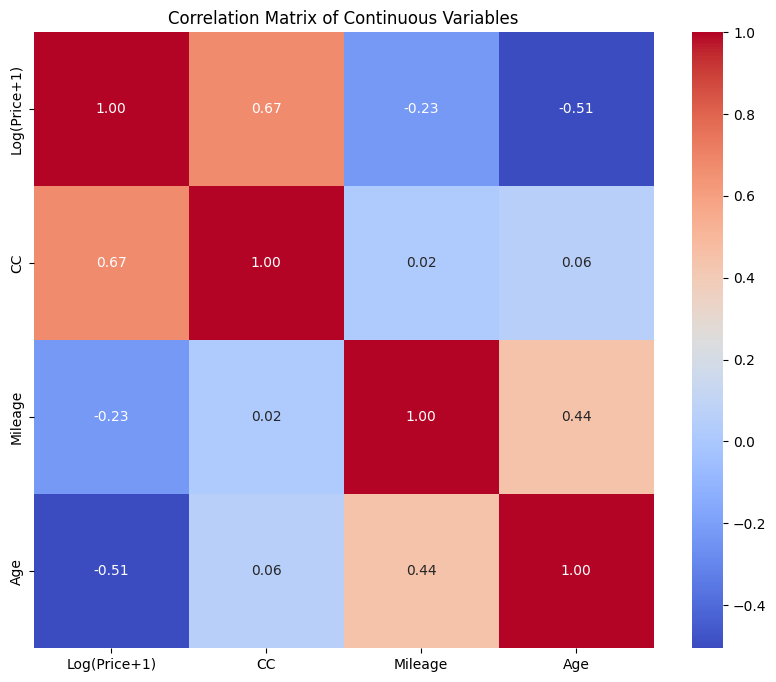

In [36]:
# Now let's again check the correlation

correlation_matrix = df[[target_feature] + numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

Since there is multicollinearity between Age and Mileage, we will combine both of them to address this issue.

We will be using weighted sum of the two columns as following (inferred from the correlation matrix)

Usage Index = 0.80\*Age + 0.20\*Mileage

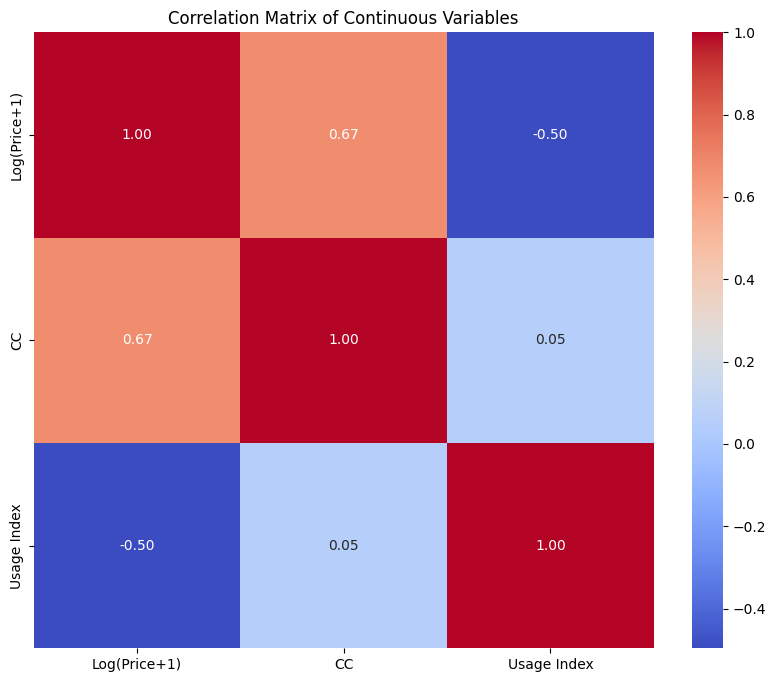

In [37]:
df['Usage Index'] = (0.80 * df['Age']) + (0.20 * df['Mileage'])

df.drop(columns=['Age', 'Mileage'])

# Update the numerical_features list
numerical_features = ['CC', 'Usage Index']

# Again show the correlation matrix
correlation_matrix = df[[target_feature] + numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

Certain categorical features ('Make', 'Model', 'Version', 'Registered City') contain values with low frequency which hinders the models ability to generalize. To streamline the dataset and improve model generalization, only the top 10-15 occurring values will be retained in these columns, while the rest will be replaced with 'Other'.

In [38]:
# Make Variable

# Count occurrences of each value in the Make column
value_counts = df['Make'].value_counts()

# Get top 10 occurring values
top_values = value_counts.head(10).index.tolist()

# Replace values not in top 10 with 'other'
df['Make'] = df['Make'].apply(lambda x: x if x in top_values else 'other')

In [39]:
# Registered City Variable

# Count occurrences of each value in the Registered City column
value_counts = df['Registered City'].value_counts()

# Get top 12 occurring values
top_values = value_counts.head(12).index.tolist()

# Replace values not in top 12 with 'other'
df['Registered City'] = df['Registered City'].apply(lambda x: x if x in top_values else 'other')

In [40]:
# Model Variable

# Count occurrences of each value in the Model column
value_counts = df['Model'].value_counts()

# Get top 20 occurring values
top_values = value_counts.head(20).index.tolist()

# Replace values not in top 20 with 'other'
df['Model'] = df['Model'].apply(lambda x: x if x in top_values else 'other')

In [41]:
# Version Variable

# Count occurrences of each value in the Version column
value_counts = df['Version'].value_counts()

# Get top 25 occurring values
top_values = value_counts.head(25).index.tolist()

# Replace values not in top 25 with 'other'
df['Version'] = df['Version'].apply(lambda x: x if x in top_values else 'other')

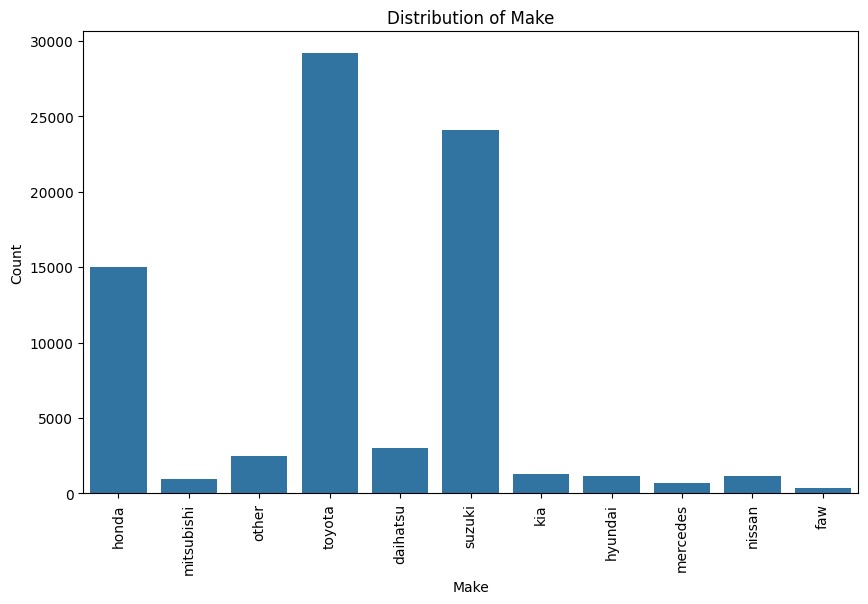

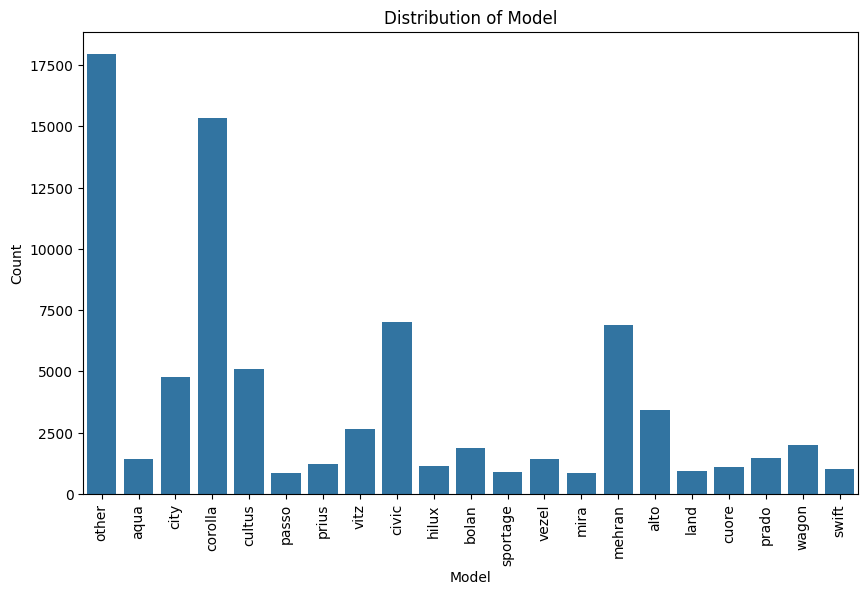

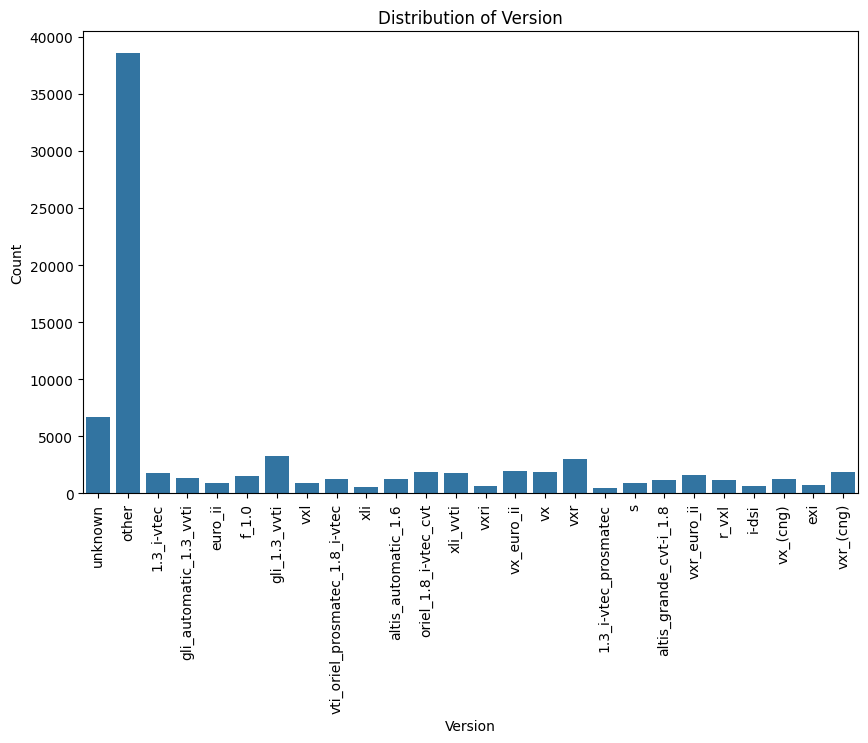

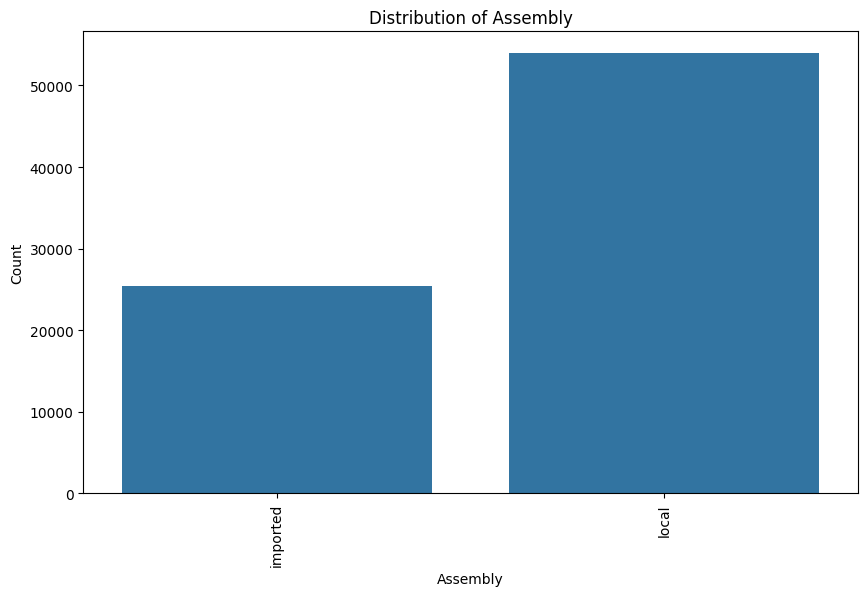

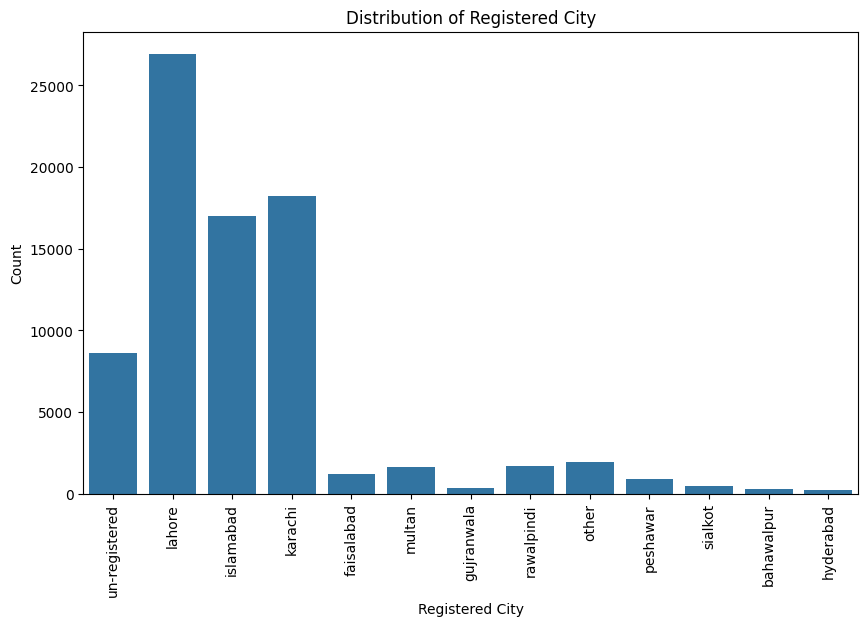

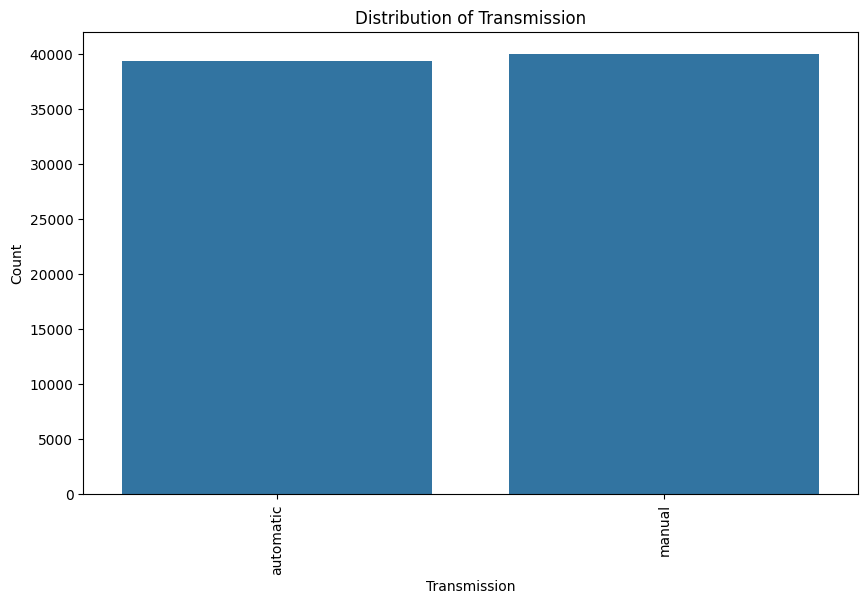

In [42]:
# Again see the distribution of categorical features

for feature in categorical_features:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df, x=feature)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.xticks(rotation=90)
  plt.ylabel('Count')
  plt.show()

In [43]:
# Drop the Version feature because there is too much randomness and still most of the data is classed as 'unknown'
df.drop(columns=['Version'], inplace=True)

# Update categorical columns
categorical_features = ['Make', 'Model', 'Assembly', 'Registered City', 'Transmission']

df.head()

,Make,Model,CC,Assembly,Mileage,Registered City,Transmission,Log(Price+1),Age,Usage Index
0,honda,other,0.154314,imported,-1.022196,un-registered,automatic,15.816991,-1.056185,-1.049387
1,mitsubishi,other,-1.092127,imported,-0.222265,lahore,automatic,13.878486,-1.056185,-0.889401
2,other,other,0.599471,local,-0.198025,lahore,automatic,16.045525,-0.481224,-0.424584
3,toyota,aqua,0.154314,imported,0.164368,islamabad,automatic,14.680508,-0.337484,-0.237113
4,honda,city,-0.142458,local,-0.379827,islamabad,manual,14.771022,-0.768705,-0.690929


In [44]:
# Create copy of this df
further_processed_df = df.copy()

In [45]:
# Perform one-hot encoding of the categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True, dtype=int)

print(df.head())

         CC   Mileage  Log(Price+1)       Age  Usage Index  Make_faw  \
0  0.154314 -1.022196     15.816991 -1.056185    -1.049387         0   
1 -1.092127 -0.222265     13.878486 -1.056185    -0.889401         0   
2  0.599471 -0.198025     16.045525 -0.481224    -0.424584         0   
3  0.154314  0.164368     14.680508 -0.337484    -0.237113         0   
4 -0.142458 -0.379827     14.771022 -0.768705    -0.690929         0   

   Make_honda  Make_hyundai  Make_kia  Make_mercedes  ...  \
0           1             0         0              0  ...   
1           0             0         0              0  ...   
2           0             0         0              0  ...   
3           0             0         0              0  ...   
4           1             0         0              0  ...   

   Registered City_islamabad  Registered City_karachi  Registered City_lahore  \
0                          0                        0                       0   
1                          0          

# **Final Model Evaluation**

In [46]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=[target_feature])  # Features
y = df[target_feature]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.08014134587518497


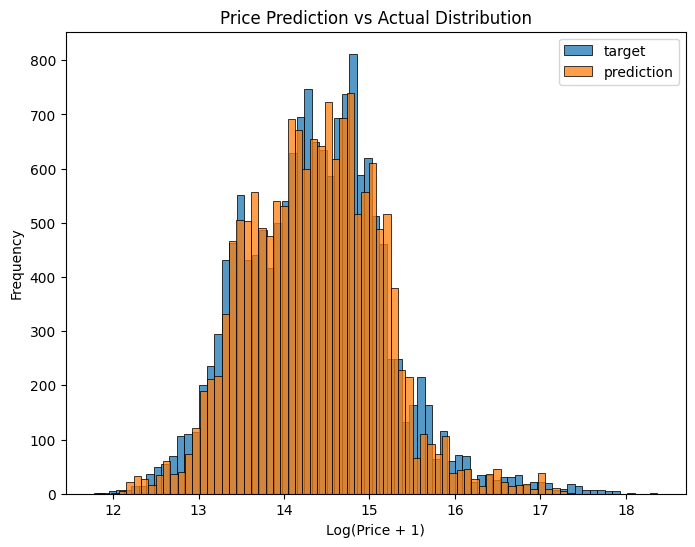

In [47]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

# Draw comparison
plt.figure(figsize=(8, 6))

sns.histplot(y_test, label='target', kde=False)
sns.histplot(y_pred, label='prediction', kde=False)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Price Prediction vs Actual Distribution')

plt.show()

Mean Squared Error: 0.1755351011546236


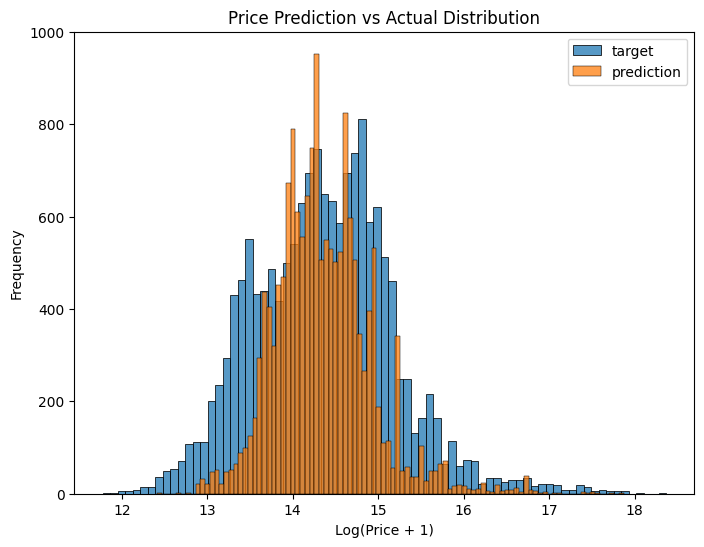

In [48]:
# Lasso Regression Model

from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)  # Alpha is the regularization strength

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

# Draw comparison
plt.figure(figsize=(8, 6))

sns.histplot(y_test, label='target', kde=False)
sns.histplot(y_pred, label='prediction', kde=False)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Price Prediction vs Actual Distribution')

plt.show()

Mean Squared Error: 0.048069034368710184


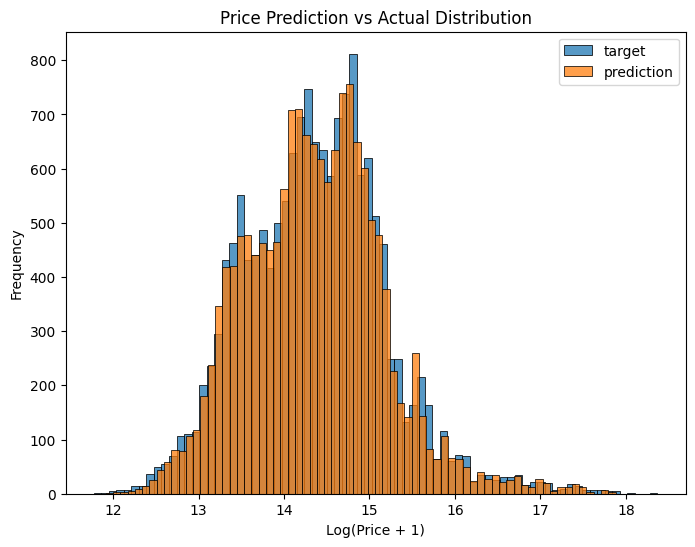

In [49]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regression model
random_forest_model = RandomForestRegressor(n_estimators=15, random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

# Draw comparison
plt.figure(figsize=(8, 6))

sns.histplot(y_test, label='target', kde=False)
sns.histplot(y_pred, label='prediction', kde=False)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Price Prediction vs Actual Distribution')

plt.show()

Mean Squared Error: 0.07011322466265231


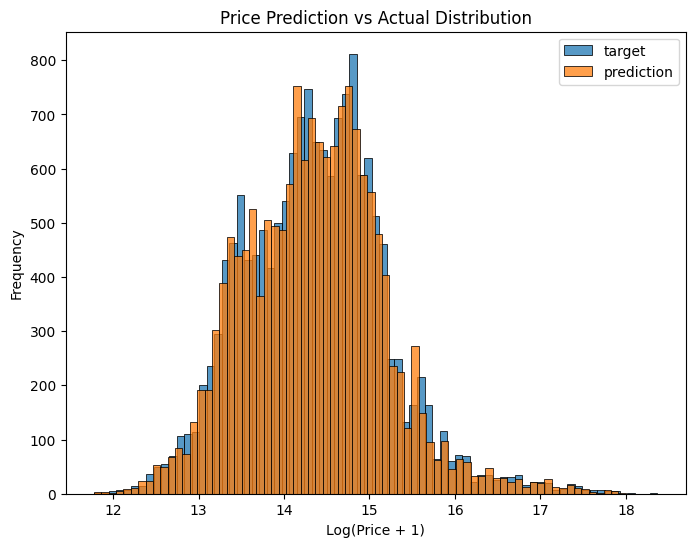

In [50]:
from sklearn.tree import DecisionTreeRegressor

# Create Decision Tree Regression model
decision_tree_regressor = DecisionTreeRegressor()

# Fit the model to the training data
decision_tree_regressor.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree_regressor.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

# Draw comparison
plt.figure(figsize=(8, 6))

sns.histplot(y_test, label='target', kde=False)
sns.histplot(y_pred, label='prediction', kde=False)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Price Prediction vs Actual Distribution')

plt.show()

Mean Squared Error: 0.058572819911156655


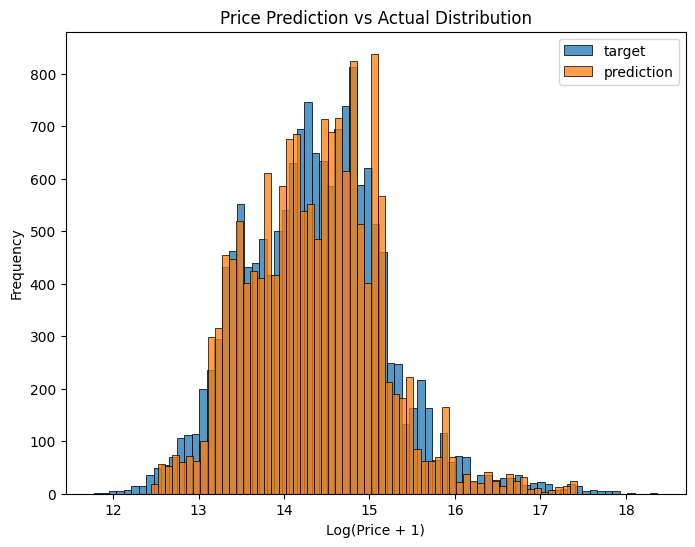

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

# Create Gradient Boosting Regression model
gradient_boosting_regressor = GradientBoostingRegressor()

# Fit the model to the training data
gradient_boosting_regressor.fit(X_train, y_train)

# Make predictions
y_pred = gradient_boosting_regressor.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

# Draw comparison
plt.figure(figsize=(8, 6))

sns.histplot(y_test, label='target', kde=False)
sns.histplot(y_pred, label='prediction', kde=False)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Price Prediction vs Actual Distribution')

plt.show()

# **Hyperparameter Tuning**

In [52]:
# Since Random Forest Regressor is giving the least error in our inital results
# Let's perform hyperparameter tuning to achieve better results

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [15, 30, 45],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_forest_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# Get the best estimator and its hyperparameters
best_random_forest_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data
y_pred = best_random_forest_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 45}
Mean Squared Error: 0.04419153945317304


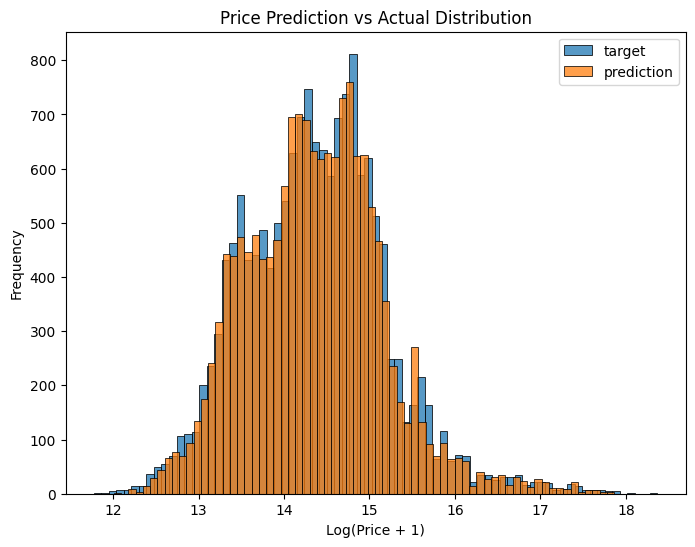

In [53]:
# Comparison of Actual vs Predicted Results
plt.figure(figsize=(8, 6))

sns.histplot(y_test, label='target', kde=False)
sns.histplot(y_pred, label='prediction', kde=False)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Price Prediction vs Actual Distribution')

plt.show()

In [55]:
from sklearn.metrics import mean_absolute_error

orig_y_test = np.expm1(y_test)
orig_y_pred = np.expm1(y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(orig_y_test, orig_y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 284113.9476203787


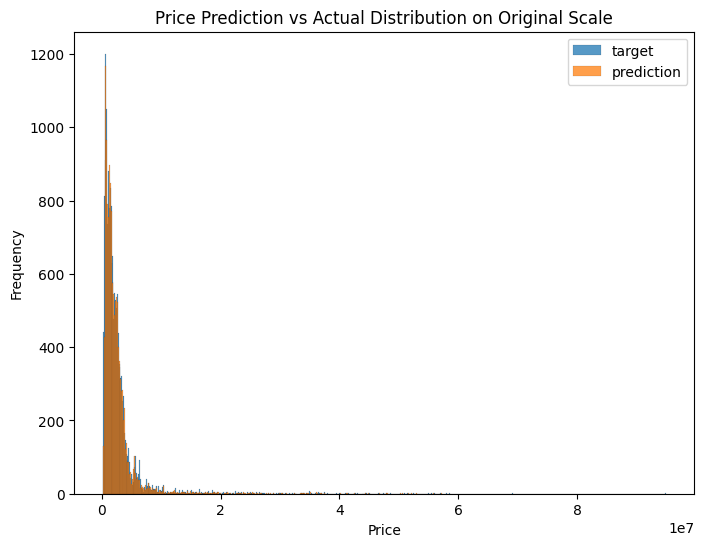

In [57]:
# Comparison of Actual vs Predicted Results on Original Scale
plt.figure(figsize=(8, 6))

sns.histplot(orig_y_test, label='target', kde=False)
sns.histplot(orig_y_pred, label='prediction', kde=False)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Price Prediction vs Actual Distribution on Original Scale')

plt.show()

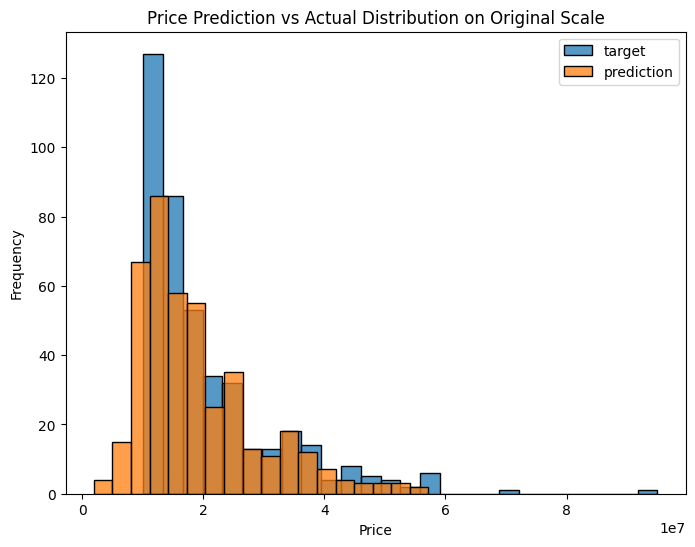

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data
filter_condition = orig_y_test >= 1 * 1e7
filtered_orig_y_test = orig_y_test[filter_condition]
filtered_orig_y_pred = orig_y_pred[filter_condition]

# Comparison of Actual vs Predicted Results on Original Scale
plt.figure(figsize=(8, 6))

sns.histplot(filtered_orig_y_test, label='target', kde=False)
sns.histplot(filtered_orig_y_pred, label='prediction', kde=False)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Price Prediction vs Actual Distribution on Original Scale')

plt.show()


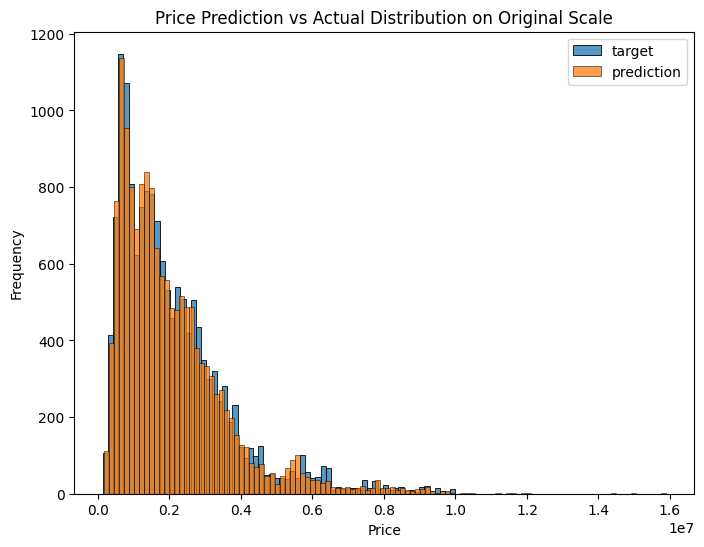

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data
filter_condition = orig_y_test <= 1 * 1e7
filtered_orig_y_test = orig_y_test[filter_condition]
filtered_orig_y_pred = orig_y_pred[filter_condition]

# Comparison of Actual vs Predicted Results on Original Scale
plt.figure(figsize=(8, 6))

sns.histplot(filtered_orig_y_test, label='target', kde=False)
sns.histplot(filtered_orig_y_pred, label='prediction', kde=False)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Price Prediction vs Actual Distribution on Original Scale')

plt.show()
